In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
dfmall = pd.read_csv('Mall_Customers.csv')

In [5]:
dfmall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
dfmall.shape

(200, 5)

In [7]:
dfmall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
print("There's Null Values : " ,dfmall.isnull().sum().max() != 0)

There's Null Values :  False


In [9]:
# Keeping the Two Lasts Columns 
X= dfmall.iloc[:,[3,4]].values

In [10]:
# Choosing the number of clusters : Finding WCSS value for different number of clusters
wcss = []

for i in range(1,11): 
  kmeans = KMeans(n_clusters = i, init='k-means++',  random_state = 111)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

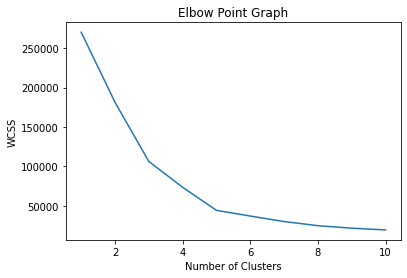

In [11]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# OPtimum Number of clusters = 5
kmeans = KMeans(n_clusters = 5, init= 'k-means++',random_state =0 )

Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


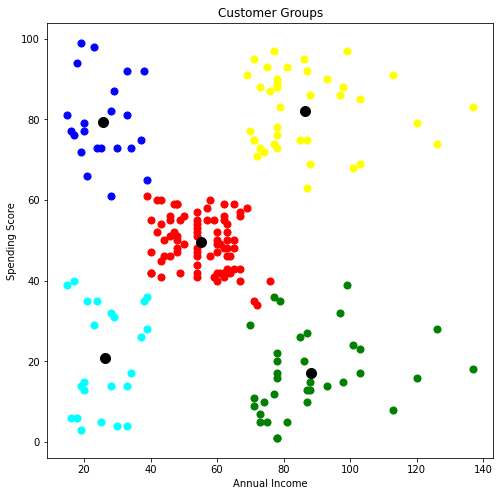

In [13]:
# Ploting all the clusters 
plt.figure(figsize = (8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label= 'Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label= 'Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label= 'Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='blue',label= 'Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='cyan',label= 'Cluster 5')

# Plotting Centroids 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroid')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.show()